In [106]:
"""
Data Dictionary
Variable

survival
Survival
0 = No, 1 = Yes

pclass
Ticket class
1 = 1st, 2 = 2nd, 3 = 3rd

sex
Sex

Age
Age in years

sibsp
# of siblings / spouses aboard the Titanic

parch
# of parents / children aboard the Titanic

ticket
Ticket number

fare
Passenger fare

cabin
Cabin number

embarked
Port of Embarkation
C = Cherbourg, Q = Queenstown, S = Southampton
"""

'\nData Dictionary\nVariable\nDefinition\nKey\nsurvival\nSurvival\n0 = No, 1 = Yes\npclass\nTicket class\n1 = 1st, 2 = 2nd, 3 = 3rd\nsex\nSex\n\nAge\nAge in years\n\nsibsp\n# of siblings / spouses aboard the Titanic\n\nparch\n# of parents / children aboard the Titanic\n\nticket\nTicket number\n\nfare\nPassenger fare\n\ncabin\nCabin number\n\nembarked\nPort of Embarkation\nC = Cherbourg, Q = Queenstown, S = Southampton\n'

# validationの工夫

In [74]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
forest = RandomForestClassifier()
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
df_train["cha"] = 0
df_test["cha"] = 1
df_train["Sex"] = le.fit_transform(df_train["Sex"])
df_test["Sex"] = le.fit_transform(df_test["Sex"])
s = pd.get_dummies(df_train["Embarked"])
df_train = pd.merge(df_train,s,right_index=True,left_index=True)
s = pd.get_dummies(df_test["Embarked"])
df_test = pd.merge(df_test,s,right_index=True,left_index=True)
df_train = df_train.iloc[:,2:]
df_test = df_test.iloc[:,1:]
print(df_train.columns)
print(df_test.columns)
print(df_train.head())

df_cha = pd.concat([df_train,df_test],axis=0)
df_cha["Embarked"].fillna("S",inplace=True)
print(df_cha.shape)
print(df_cha.isnull().sum())
print(df_cha.groupby(["Embarked"]).sum())
a = ["Pclass","Sex","Age","SibSp","Parch","Fare","S","Q","C"]
X_cha = df_cha.ix[:,a]
y_cha = df_cha["cha"]
X_cha["Age"].fillna(X_cha.Age.mean(),inplace=True)
X_cha["Fare"].fillna(X_cha.Fare.mean(),inplace=True)
print(X_cha.isnull().sum())
X_train, X_test, y_train, y_test = train_test_split(X_cha, y_cha, test_size = 0.3)
forest.fit(X_train, y_train)
print(X_train.head())
print(X_train.shape)
print(y_train.shape)
print(accuracy_score(y_true=y_train, y_pred=forest.predict(X_train)))
print(accuracy_score(y_true=y_test, y_pred=forest.predict(X_test)))

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'cha', 'C', 'Q', 'S'],
      dtype='object')
Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'cha', 'C', 'Q', 'S'],
      dtype='object')
   Pclass                                               Name  Sex   Age  \
0       3                            Braund, Mr. Owen Harris    1  22.0   
1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0   
2       3                             Heikkinen, Miss. Laina    0  26.0   
3       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0   
4       3                           Allen, Mr. William Henry    1  35.0   

   SibSp  Parch            Ticket     Fare Cabin Embarked  cha  C  Q  S  
0      1      0         A/5 21171   7.2500   NaN        S    0  0  0  1  
1      1      0          PC 17599  71.2833   C85        C    0  1  0  0  
2      0      0  STON/O2. 31012

# やりたいこと
- PCA、randomforestによる次元削減
- テキストデータの変換

# トレーニングデータの量増加

In [57]:
df_result = pd.read_csv("predcit_result_data.csv")
df_x_te = pd.read_csv("test.csv")
df_result = pd.merge(df_result,df_x_te.iloc[:,1:],right_index=True,left_index=True)
df = pd.concat((df,df_result),axis=0,ignore_index=True)
print(df_result.head())
print(df.head())

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         0       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  
    Age Cabin Embarked     Fare Name  Parch  PassengerId  Pclass  SUM Sex  \
0  22.0  

# データの増加(2)

In [369]:
df_ex1 = df
df_ex2 = df
df_ex1["Age"] = df_ex1["Age"].apply(lambda x:x+1)
df_ex2["Age"] = df_ex2["Age"].apply(lambda x:x-1)
print(df_ex.head())
df = pd.concat([df,df_ex1,df_ex2],axis=0,ignore_index=True)
print(df.shape)
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  23.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  39.0      1   
2                             Heikkinen, Miss. Laina  female  27.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  36.0      1   
4                           Allen, Mr. William Henry    male  36.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
(2

# データのインポート

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import re

df=pd.read_csv("train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [2]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df.ix[:,4]=le.fit_transform(df.ix[:,4])

/home/masakick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


# 名前から敬称取り出し

In [4]:
def miss_only(text):
    text = re.sub(r".*\W([a-zA-Z]+?)\.\W.*",r"\1",text)
    if text not in ["Miss","Mr","Master","Mrs"]:
        return "other"
    else:
        return text
df["Name"] = df["Name"].map(miss_only)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Mr,1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Mrs,0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Miss,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Mrs,0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Mr,1,35.0,0,0,373450,8.0500,NaN,S


# 子供判定

In [17]:
df["child"]=df["Age"].apply(lambda x:1 if x < 15 else 0)
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,child
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,S,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,S,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,C,1


# embarkedの違う変換

In [5]:
df["Embarked"]=df["Embarked"].map({"S":1,"Q":2,"C":3})
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Mr,1,22.0,1,0,A/5 21171,7.2500,NaN,1.0
1,2,1,1,Mrs,0,38.0,1,0,PC 17599,71.2833,C85,3.0
2,3,1,3,Miss,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0
3,4,1,1,Mrs,0,35.0,1,0,113803,53.1000,C123,1.0
4,5,0,3,Mr,1,35.0,0,0,373450,8.0500,NaN,1.0


# cabin情報の活用

In [63]:
def cabin_cha(text):
    if type(text) is str:
        return text[0]
    else:
        return "NaN"
df["Cabin"] = df["Cabin"].apply(cabin_cha)
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Mr,1,22.0,1,0,A/5 21171,7.2500,NaN,1.0
1,2,1,1,Mrs,0,38.0,1,0,PC 17599,71.2833,C,3.0
2,3,1,3,Miss,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0
3,4,1,1,Mrs,0,35.0,1,0,113803,53.1000,C,1.0
4,5,0,3,Mr,1,35.0,0,0,373450,8.0500,NaN,1.0


# 年齢の詳細な補完

In [6]:
"""
def name_classifier(name_df):    
    name_class_df = pd.DataFrame(columns=['miss','mrs','master','mr'])
    
    for name in name_df:        
        if 'Miss.' in name:
            df = pd.DataFrame([[1,0,0,0]],columns=['miss','mrs','master','mr'])
        elif 'Mrs.' in name:
            df = pd.DataFrame([[0,1,0,0]],columns=['miss','mrs','master','mr'])
        elif 'Master.' in name:
            df = pd.DataFrame([[0,0,1,0]],columns=['miss','mrs','master','mr'])
        elif 'Mr.' in name:
            df = pd.DataFrame([[0,0,0,1]],columns=['miss','mrs','master','mr'])
        else :
            df = pd.DataFrame([[0,0,0,0]],columns=['miss','mrs','master','mr'])
        name_class_df = name_class_df.append(df,ignore_index=True)        
    return name_class_df
"""

"\ndef name_classifier(name_df):    \n    name_class_df = pd.DataFrame(columns=['miss','mrs','master','mr'])\n    \n    for name in name_df:        \n        if 'Miss.' in name:\n            df = pd.DataFrame([[1,0,0,0]],columns=['miss','mrs','master','mr'])\n        elif 'Mrs.' in name:\n            df = pd.DataFrame([[0,1,0,0]],columns=['miss','mrs','master','mr'])\n        elif 'Master.' in name:\n            df = pd.DataFrame([[0,0,1,0]],columns=['miss','mrs','master','mr'])\n        elif 'Mr.' in name:\n            df = pd.DataFrame([[0,0,0,1]],columns=['miss','mrs','master','mr'])\n        else :\n            df = pd.DataFrame([[0,0,0,0]],columns=['miss','mrs','master','mr'])\n        name_class_df = name_class_df.append(df,ignore_index=True)        \n    return name_class_df\n"

In [20]:
#ss=name_classifier(df["Name"])
#ss=pd.DataFrame(ss.values,index=range(1,892),columns=["miss","mrs","master","mr"])
#df=pd.merge(df,ss,right_index=True,left_index=True)

# 家族の処理

In [6]:
def sum_maker(x,y):
    sums=pd.DataFrame(columns=["SUM"])
    for i in range(len(x)):
        s=pd.DataFrame([int(x[i])+int(y[i])],columns=["SUM"])
        sums=sums.append(s,ignore_index=True)
    return sums

In [7]:
sums=sum_maker(df["SibSp"].values,df["Parch"].values)
sums=pd.DataFrame(sums.values,index=range(df.shape[0]),columns=["SUM"])
df=pd.merge(df,sums,right_index=True,left_index=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SUM
0,1,0,3,Mr,1,22.0,1,0,A/5 21171,7.2500,NaN,1.0,1
1,2,1,1,Mrs,0,38.0,1,0,PC 17599,71.2833,C85,3.0,1
2,3,1,3,Miss,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0,0
3,4,1,1,Mrs,0,35.0,1,0,113803,53.1000,C123,1.0,1
4,5,0,3,Mr,1,35.0,0,0,373450,8.0500,NaN,1.0,0


# isaloneの追加

In [8]:
df["isalone"] = df["SUM"].apply(lambda x: 1 if x == 0 else 0)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SUM,isalone
0,1,0,3,Mr,1,22.0,1,0,A/5 21171,7.2500,NaN,1.0,1,0
1,2,1,1,Mrs,0,38.0,1,0,PC 17599,71.2833,C85,3.0,1,0
2,3,1,3,Miss,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0,0,1
3,4,1,1,Mrs,0,35.0,1,0,113803,53.1000,C123,1.0,1,0
4,5,0,3,Mr,1,35.0,0,0,373450,8.0500,NaN,1.0,0,1


# 名前の処理

In [10]:
def name(x):
    namesum1=[]
    namesum={}
    namesum2=[]
    for i in range(len(x)):
        name=x[i].split(",")
        if name[0] in namesum1:
            namesum1.append(name[0])
            namesum[name[0]]+=1
        else:
            namesum[name[0]]=1
            namesum1.append(name[0])
    for p in range(len(namesum1)):
        namesum2.append([namesum1[p],namesum[namesum1[p]]])
    namesum3=pd.DataFrame(namesum2,index=range(len(namesum1)),columns=["myoji","namesum"])
    return namesum3

In [11]:
namesum=name(df["Name"])
df=pd.merge(df,namesum,right_index=True,left_index=True)

# embarked のdummy化

In [12]:
s=pd.get_dummies(df["Embarked"])
df=pd.merge(df,s,left_index=True,right_index=True)

In [13]:
print(df.columns)
print(len(df.columns))
print(df.head(5))

Index(['PassengerId',    'Survived',      'Pclass',        'Name',
               'Sex',         'Age',       'SibSp',       'Parch',
            'Ticket',        'Fare',       'Cabin',    'Embarked',
              'miss',         'mrs',      'master',          'mr',
               'SUM',     'isalone',       'myoji',     'namesum',
                 1.0,           2.0,           3.0],
      dtype='object')
23
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May

In [9]:
a = ['Pclass', 'Sex', 'Age', 'Fare', 'SUM',"Name",
       "Embarked","isalone"]

In [10]:
df2 = df
df = df2.ix[:,a]

/home/masakick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [123]:
df.head(10)

,Pclass,Sex,Age,Fare,SUM,Name,Embarked,isalone
0,3,1,22.0,7.2500,1,Mr,1.0,0
1,1,0,38.0,71.2833,1,Mrs,3.0,0
2,3,0,26.0,7.9250,0,Miss,1.0,1
3,1,0,35.0,53.1000,1,Mrs,1.0,0
4,3,1,35.0,8.0500,0,Mr,1.0,1
5,3,1,NaN,8.4583,0,Mr,2.0,1
6,1,1,54.0,51.8625,0,Mr,1.0,1
7,3,1,2.0,21.0750,4,Master,1.0,0
8,3,0,27.0,11.1333,2,Mrs,1.0,0
9,2,0,14.0,30.0708,1,Mrs,3.0,0


# 欠損値補完

In [11]:
mr_to_num = {"Mr":1,"Master":2,"Miss":3,"Mrs":4,"other":5}
df["Name"] = df["Name"].map(mr_to_num)
df.head()

,Pclass,Sex,Age,Fare,SUM,Name,Embarked,isalone
0,3,1,22.0,7.2500,1,1,1.0,0
1,1,0,38.0,71.2833,1,4,3.0,0
2,3,0,26.0,7.9250,0,3,1.0,1
3,1,0,35.0,53.1000,1,4,1.0,0
4,3,1,35.0,8.0500,0,1,1.0,1


In [13]:
from sklearn.preprocessing import Imputer

df["Embarked"].fillna(1)

imr1=Imputer(missing_values="NaN",strategy="mean",axis=0)
imr2=Imputer(missing_values="NaN",strategy="mean",axis=0)
imr3=Imputer(missing_values="NaN",strategy="mean",axis=0)
imr4=Imputer(missing_values="NaN",strategy="mean",axis=0)

df[df["Name"]==1]=imr1.fit_transform(df[df["Name"]==1])
df[df["Name"]==2]=imr2.fit_transform(df[df["Name"]==2])
df[df["Name"]==3]=imr3.fit_transform(df[df["Name"]==3])
df[df["Name"]==4]=imr4.fit_transform(df[df["Name"]==4])

In [14]:
imr=Imputer(missing_values="NaN",strategy="mean",axis=0)
imr.fit(df)
df=pd.DataFrame(imr.transform(df),columns=a)
print(df.head(20))

    Pclass  Sex        Age     Fare  SUM  Name  Embarked  isalone
0      3.0  1.0  22.000000   7.2500  1.0   1.0       1.0      0.0
1      1.0  0.0  38.000000  71.2833  1.0   4.0       3.0      0.0
2      3.0  0.0  26.000000   7.9250  0.0   3.0       1.0      1.0
3      1.0  0.0  35.000000  53.1000  1.0   4.0       1.0      0.0
4      3.0  1.0  35.000000   8.0500  0.0   1.0       1.0      1.0
5      3.0  1.0  32.368090   8.4583  0.0   1.0       2.0      1.0
6      1.0  1.0  54.000000  51.8625  0.0   1.0       1.0      1.0
7      3.0  1.0   2.000000  21.0750  4.0   2.0       1.0      0.0
8      3.0  0.0  27.000000  11.1333  2.0   4.0       1.0      0.0
9      2.0  0.0  14.000000  30.0708  1.0   4.0       3.0      0.0
10     3.0  0.0   4.000000  16.7000  2.0   3.0       1.0      0.0
11     1.0  0.0  58.000000  26.5500  0.0   3.0       1.0      1.0
12     3.0  1.0  20.000000   8.0500  0.0   1.0       1.0      1.0
13     3.0  1.0  39.000000  31.2750  6.0   1.0       1.0      0.0
14     3.0

# categorical_ageの作成

In [15]:
#df2 = df
print(df.head(10))
df["Categorical_Age"]=pd.cut(df["Age"],5)
print(df["Categorical_Age"].head(30))

   Pclass  Sex       Age     Fare  SUM  Name  Embarked  isalone
0     3.0  1.0  22.00000   7.2500  1.0   1.0       1.0      0.0
1     1.0  0.0  38.00000  71.2833  1.0   4.0       3.0      0.0
2     3.0  0.0  26.00000   7.9250  0.0   3.0       1.0      1.0
3     1.0  0.0  35.00000  53.1000  1.0   4.0       1.0      0.0
4     3.0  1.0  35.00000   8.0500  0.0   1.0       1.0      1.0
5     3.0  1.0  32.36809   8.4583  0.0   1.0       2.0      1.0
6     1.0  1.0  54.00000  51.8625  0.0   1.0       1.0      1.0
7     3.0  1.0   2.00000  21.0750  4.0   2.0       1.0      0.0
8     3.0  0.0  27.00000  11.1333  2.0   4.0       1.0      0.0
9     2.0  0.0  14.00000  30.0708  1.0   4.0       3.0      0.0
0     (16.336, 32.252]
1     (32.252, 48.168]
2     (16.336, 32.252]
3     (32.252, 48.168]
4     (32.252, 48.168]
5     (32.252, 48.168]
6     (48.168, 64.084]
7       (0.34, 16.336]
8     (16.336, 32.252]
9       (0.34, 16.336]
10      (0.34, 16.336]
11    (48.168, 64.084]
12    (16.336, 32.25

In [16]:
df.ix[df["Age"] < 16.336,"Age"] = 0
df.ix[(df["Age"] < 32.252) & (df["Age"] >= 16.336),"Age"] = 1
df.ix[(df["Age"] < 48.168) & (df["Age"] >= 32.252),"Age"] = 2
df.ix[(df["Age"] < 64.084) & (df["Age"] >= 48.168),"Age"] = 3
df.ix[df["Age"] >= 64.084,"Age"] = 4
print(df.head())

   Pclass  Sex  Age     Fare  SUM  Name  Embarked  isalone   Categorical_Age
0     3.0  1.0  1.0   7.2500  1.0   1.0       1.0      0.0  (16.336, 32.252]
1     1.0  0.0  2.0  71.2833  1.0   4.0       3.0      0.0  (32.252, 48.168]
2     3.0  0.0  1.0   7.9250  0.0   3.0       1.0      1.0  (16.336, 32.252]
3     1.0  0.0  2.0  53.1000  1.0   4.0       1.0      0.0  (32.252, 48.168]
4     3.0  1.0  2.0   8.0500  0.0   1.0       1.0      1.0  (32.252, 48.168]


/home/masakick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


# categorical fareの作成

In [17]:
#df2 = df
#df = df2
df["Categorical_Fare"]=pd.qcut(df["Fare"],4)
print(df.head(20))

    Pclass  Sex  Age     Fare  SUM  Name  Embarked  isalone   Categorical_Age  \
0      3.0  1.0  1.0   7.2500  1.0   1.0       1.0      0.0  (16.336, 32.252]   
1      1.0  0.0  2.0  71.2833  1.0   4.0       3.0      0.0  (32.252, 48.168]   
2      3.0  0.0  1.0   7.9250  0.0   3.0       1.0      1.0  (16.336, 32.252]   
3      1.0  0.0  2.0  53.1000  1.0   4.0       1.0      0.0  (32.252, 48.168]   
4      3.0  1.0  2.0   8.0500  0.0   1.0       1.0      1.0  (32.252, 48.168]   
5      3.0  1.0  2.0   8.4583  0.0   1.0       2.0      1.0  (32.252, 48.168]   
6      1.0  1.0  3.0  51.8625  0.0   1.0       1.0      1.0  (48.168, 64.084]   
7      3.0  1.0  0.0  21.0750  4.0   2.0       1.0      0.0    (0.34, 16.336]   
8      3.0  0.0  1.0  11.1333  2.0   4.0       1.0      0.0  (16.336, 32.252]   
9      2.0  0.0  0.0  30.0708  1.0   4.0       3.0      0.0    (0.34, 16.336]   
10     3.0  0.0  0.0  16.7000  2.0   3.0       1.0      0.0    (0.34, 16.336]   
11     1.0  0.0  3.0  26.550

In [18]:
df.ix[df["Fare"] < 7.91,"Fare"] = 0
df.ix[(df["Fare"] < 14.454) & (df["Fare"] >= 7.91),"Fare"] = 1
df.ix[(df["Fare"] < 31) & (df["Fare"] >= 14.454),"Fare"] = 2
df.ix[df["Fare"] >= 31,"Fare"] = 3
print(df.head())

   Pclass  Sex  Age  Fare  SUM  Name  Embarked  isalone   Categorical_Age  \
0     3.0  1.0  1.0   0.0  1.0   1.0       1.0      0.0  (16.336, 32.252]   
1     1.0  0.0  2.0   3.0  1.0   4.0       3.0      0.0  (32.252, 48.168]   
2     3.0  0.0  1.0   1.0  0.0   3.0       1.0      1.0  (16.336, 32.252]   
3     1.0  0.0  2.0   3.0  1.0   4.0       1.0      0.0  (32.252, 48.168]   
4     3.0  1.0  2.0   1.0  0.0   1.0       1.0      1.0  (32.252, 48.168]   

  Categorical_Fare  
0   (-0.001, 7.91]  
1  (31.0, 512.329]  
2   (7.91, 14.454]  
3  (31.0, 512.329]  
4   (7.91, 14.454]  


In [19]:
y=df2.iloc[:,1]
x=df
y

0      0
1      1
2      1
3      1
4      0
5      0
6      0
7      0
8      1
9      1
10     1
11     1
12     0
13     0
14     0
15     1
16     0
17     1
18     0
19     1
20     0
21     1
22     1
23     1
24     0
25     1
26     0
27     0
28     1
29     0
      ..
861    0
862    1
863    0
864    0
865    1
866    1
867    0
868    0
869    1
870    0
871    1
872    0
873    0
874    1
875    1
876    0
877    0
878    0
879    1
880    1
881    0
882    0
883    0
884    0
885    0
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [97]:
from sklearn.preprocessing import StandardScaler
sc1=StandardScaler()
sc2=StandardScaler()
sc3=StandardScaler()
sc4=StandardScaler()
x["Fare"]= sc1.fit_transform(x["Fare"].reshape(len(x["Fare"].values),1))
#x["SibSp"]=sc2.fit_transform(x["SibSp"])
#x["Parch"]=sc3.fit_transform(x["Parch"])
x["Age"]=sc4.fit_transform(x["Age"].reshape(len(x["Fare"].values),1))

/home/masakick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
/home/masakick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if __name__ == '__main__':


In [20]:
x.head(5)

,Pclass,Sex,Age,Fare,SUM,Name,Embarked,isalone,Categorical_Age,Categorical_Fare
0,3.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,"(16.336, 32.252]","(-0.001, 7.91]"
1,1.0,0.0,2.0,3.0,1.0,4.0,3.0,0.0,"(32.252, 48.168]","(31.0, 512.329]"
2,3.0,0.0,1.0,1.0,0.0,3.0,1.0,1.0,"(16.336, 32.252]","(7.91, 14.454]"
3,1.0,0.0,2.0,3.0,1.0,4.0,1.0,0.0,"(32.252, 48.168]","(31.0, 512.329]"
4,3.0,1.0,2.0,1.0,0.0,1.0,1.0,1.0,"(32.252, 48.168]","(7.91, 14.454]"


In [21]:
b = ["Pclass","Sex","Age","Fare","isalone","Embarked","SUM"]
x = x.ix[:,b]

In [22]:
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

/home/masakick/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# randomforestによる重要度検索

In [229]:
import numpy as np
new_ind = [4,3,2,1,2.5]
a = np.arange(5)
print(a)

a[np.argsort(new_ind)]
np.cumsum(a)

[0 1 2 3 4]


array([ 0,  1,  3,  6, 10], dtype=int32)

In [230]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
def forest_decomposition(x_train,x_test,y_train,n_components=5):
    forest.fit(x_train,y_train)
    print([[name, ratio] for name,ratio in zip(x_train.columns, forest.feature_importances_)])
    print(forest.feature_importances_)
    new_ind = forest.feature_importances_
    print(x_train.columns[np.argsort(new_ind)[::-1]])
    x_train = x_train[x_train.columns[np.argsort(new_ind)[::-1]]]
    x_test=x_test[x_test.columns[np.argsort(new_ind)]]
    plt.plot(range(x_train.shape[1]),np.sort(new_ind)[::-1])
    plt.plot(range(x_train.shape[1]),np.cumsum(np.sort(new_ind)[::-1]))
    x_train = x_train.ix[:,:n_components]
    x_test = x_test.ix[:,:n_components]
    return x_train,x_test

[['Pclass', 0.10201670674267897], ['Sex', 0.078310769385890627], ['Age', 0.19743562856814414], ['SibSp', 0.026783098192448358], ['Parch', 0.022728264779532017], ['Fare', 0.18626190859481986], ['miss', 0.034907203060795915], ['mrs', 0.038147544933833724], ['master', 0.0085088673135530063], ['mr', 0.16275808587933105], ['SUM', 0.047202912226067317], ['namesum', 0.048064433162418277], ['C', 0.013393474665950205], ['Q', 0.011163136866007853], ['S', 0.022317965628528648]]
[ 0.10201671  0.07831077  0.19743563  0.0267831   0.02272826  0.18626191
  0.0349072   0.03814754  0.00850887  0.16275809  0.04720291  0.04806443
  0.01339347  0.01116314  0.02231797]
Index(['Age', 'Fare', 'mr', 'Pclass', 'Sex', 'namesum', 'SUM', 'mrs', 'miss',
       'SibSp', 'Parch', 'S', 'C', 'Q', 'master'],
      dtype='object')
(623, 3)
      Age      Fare   mr
857  51.0   26.5500  1.0
52   49.0   76.7292  0.0
386   1.0   46.9000  0.0
124  54.0   77.2875  1.0
578  35.0   14.4583  0.0
549   8.0   36.7500  0.0
118  24.0

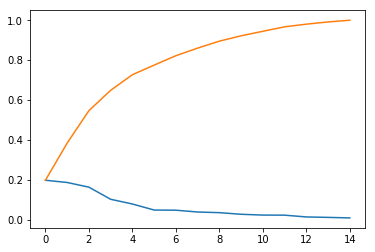

In [231]:
x_train, x_test = forest_decomposition(x_train,x_test,y_train,n_components=3)
print(x_train.shape)
print(x_train)

# PCAによる次元圧縮

In [101]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(x_train,y_train)
print(pca.explained_variance_ratio_)
x_train = pca.transform(x_train)
x_test = pca.transform(x_test)
print(x_train.shape)
print(x_train)

[ 0.93015764  0.06984236]
(623, 2)
[[ -5.21992052  21.67574017]
 [ 44.89083361  17.97444368]
 [ 13.59941096 -29.43064452]
 ..., 
 [-24.71740219   1.30580807]
 [-14.85062661   6.91835302]
 [  7.52996583  30.07488324]]


# LDAによる次元圧縮

In [104]:
from sklearn.lda import LDA
lda = LDA(n_components=5)
lda.fit(x_train,y_train)
print(lda.coef_)
x_train = lda.transform(x_train)
x_test = lda.transform(x_test)
print(x_train.shape)
print(x_train)

[[ 0.0102694  -0.01653719]]
(623, 1)
[[ -7.84254708e-01]
 [  3.11666476e-01]
 [  1.19211434e+00]
 [  1.66544903e-01]
 [ -5.37539175e-01]
 [  7.54507309e-01]
 [  4.58369878e+00]
 [ -2.09980199e-01]
 [ -5.17767027e-01]
 [ -3.51736135e-01]
 [ -2.44459262e-01]
 [ -2.50249752e-01]
 [ -3.80292157e-01]
 [ -8.38852445e-02]
 [  3.45562797e-02]
 [ -7.05266287e-01]
 [ -1.87671072e+00]
 [ -3.05480922e-01]
 [ -1.28477172e-01]
 [  1.28733102e-01]
 [ -1.08247269e+00]
 [  3.83450353e-01]
 [ -4.13678803e-01]
 [ -3.72349972e-01]
 [ -3.72944844e-01]
 [ -1.35099456e-01]
 [ -2.28235986e-01]
 [ -4.37094759e-01]
 [ -6.01237587e-01]
 [ -9.50367659e-01]
 [ -6.00544840e-01]
 [ -5.39680221e-01]
 [  2.29272968e-01]
 [ -2.32892346e-01]
 [ -2.70053636e-01]
 [  8.14831785e-01]
 [  5.51197068e-02]
 [ -2.46084698e-01]
 [ -8.27265104e-01]
 [  7.18452628e-01]
 [ -1.08267638e+00]
 [ -3.97816970e-01]
 [ -5.39680221e-01]
 [ -3.48780543e-01]
 [ -1.81040618e-01]
 [ -5.34185572e-01]
 [ -2.90521507e-01]
 [ -2.98145347e-01]
 [ 

C:\Users\User\Documents\anaconda\lib\site-packages\sklearn\lda.py:6: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)


In [71]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_jobs=-1)
#from sklearn.ensemble import GradientBoostingClassifier
#gbm = GradientBoostingClassifier()
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
from sklearn.svm import SVC
svc = SVC(probability=True,kernel="rbf")
svc_lin = SVC(probability=True,kernel="linear")
import lightgbm as lgb
gbm = lgb.LGBMClassifier(objective="binary",max_depth=30,n_jobs=-1)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [81]:
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier

depth_ls = [10,15,20,25,30]
num_ls = [2**30-1]
lng_ls = [0.01,0.015,0.05,0.1,0.3]
sub_sample_ls = [0.6,0.7,0.8,0.9,1.0]
gamma_ls = [0,0.05,0.1,0.3,0.5]
alpha_ls = [0,0.1,0.5]
lambda_ls = [0.01,0.1]
min_child_ls = [1,3,5,7]
colsample_ls = [0.6,0.7,0.8,0.9,1.0]
lgb_params = {"max_depth":depth_ls[4:],
    "subsample":sub_sample_ls,
    "learning_rate":lng_ls,"min_split_gain":gamma_ls,
    "lambda_l1":alpha_ls,"lambda_l2":lambda_ls,
    "min_child_weight":min_child_ls,"colsample_bytree":colsample_ls}
pen_ls = ["l1","l2"]
c_ls = [0.001,0.01,0.1,1,10,100]
lr_params = {"penalty":pen_ls,"C":c_ls}
svc_params = {"C":c_ls,"gamma":gamma_ls}
est_ls = [60,120,300,500,800]
forest_params = {"max_depth":depth_ls[:4],"n_estimators":est_ls[:4]}
P_ls = [2,3]
N_neighbors = [2,4,8,16]
knn_params = {"p":P_ls,"n_neighbors":N_neighbors}

gs_lgb = GridSearchCV(estimator=gbm,cv=10,param_grid=lgb_params,n_jobs=-1,verbose=1)
#gs.fit(x_train,y_train)
gs_lr = GridSearchCV(estimator=lr,param_grid=lr_params,n_jobs=-1,cv=20,verbose=1)
#gs1.fit(x_train,y_train)
gs_svc = GridSearchCV(estimator=svc,param_grid=svc_params,n_jobs=-1,cv=20,verbose=1)
#gs2.fit(x_train,y_train)
gs_for = GridSearchCV(estimator=forest,param_grid=forest_params,cv=20,n_jobs=-1,verbose=1)
#gs3.fit(x_train,y_train)
gs4_knn = GridSearchCV(estimator=knn,param_grid=knn_params,cv=20,n_jobs=-1,verbose=1)
gs4_knn.fit(x_train,y_train)
gs_svc_lin = GridSearchCV(estimator=svc_lin,param_grid=svc_params,n_jobs=-1,cv=20,verbose=1)

Fitting 20 folds for each of 8 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    0.7s finished


In [77]:
help(lgb)

Help on package lightgbm:

NAME
    lightgbm - LightGBM, Light Gradient Boosting Machine.

DESCRIPTION
    Contributors: https://github.com/Microsoft/LightGBM/graphs/contributors

PACKAGE CONTENTS
    basic
    callback
    compat
    engine
    lib_lightgbm
    libpath
    plotting
    sklearn

CLASSES
    builtins.object
        lightgbm.basic.Booster
        lightgbm.basic.Dataset
    sklearn.base.BaseEstimator(builtins.object)
        lightgbm.sklearn.LGBMModel
            lightgbm.sklearn.LGBMClassifier(lightgbm.sklearn.LGBMModel, sklearn.base.ClassifierMixin)
            lightgbm.sklearn.LGBMRanker
            lightgbm.sklearn.LGBMRegressor(lightgbm.sklearn.LGBMModel, sklearn.base.RegressorMixin)
    
    class Booster(builtins.object)
     |  Booster in LightGBM.
     |  
     |  Methods defined here:
     |  
     |  __copy__(self)
     |  
     |  __deepcopy__(self, _)
     |  
     |  __del__(self)
     |  
     |  __getstate__(self)
     |  
     |  __init__(self, params=Non

In [423]:
forest = RandomForestClassifier(max_depth=15,n_estimators=120)
forest.fit(x_train,y_train)
svm = SVC(probability=True,C=10,gamma=0.05)
svm.fit(x_train,y_train)
lr = LogisticRegression(C=1,penalty="l2")
lr.fit(x_train,y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [25]:
def mk_clf(x_train,y_train,*clfs):
    if len(clfs) > 1:
        clf_ls = []
        for clf in clfs:
            clf_ls.append((str(clf),clf))
        new_clf = VotingClassifier(estimators=clf_ls,n_jobs=-1,voting="soft")
    else:
        new_clf = clfs[0]
    new_clf.fit(x_train,y_train)
    print(accuracy_score(y_true=y_train,y_pred=new_clf.predict(x_train)))
    print(accuracy_score(y_true=y_test,y_pred=new_clf.predict(x_test)))
    return new_clf

In [ ]:
new_clf = mk_clf(x_train,y_train,gs_lgb,gs_lr,gs_svc_lin,gs_for)

Fitting 10 folds for each of 15000 candidates, totalling 150000 fits


In [74]:
score_ls = []
for i in range(20):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
    score_ls.append(accuracy_score(y_test,new_clf.predict(x_test)))
    print(accuracy_score(y_test,new_clf.predict(x_test)))
print("accuracy:",np.mean(score_ls),"+/-",np.std(score_ls))

0.858208955224
0.84328358209
0.832089552239
0.847014925373
0.85447761194
0.850746268657
0.839552238806
0.832089552239
0.832089552239
0.80223880597
0.828358208955
0.824626865672
0.85447761194
0.839552238806
0.828358208955
0.850746268657
0.832089552239
0.820895522388
0.847014925373
0.828358208955
accuracy: 0.837313432836 +/- 0.0134742314069


カテゴリ化　svm 0.81887677175 +/- 0.0478131357673
非カテゴリ化　lr,svm 0.826843536168 +/- 0.059019734912
全部　0.820391923265 +/- 0.0495593393716
svm 0.822004826491 +/- 0.0526570211202
forest,svm 0.812280058651 +/- 0.0453577598613


In [68]:
print(accuracy_score(y_true=y_train,y_pred=new_clf.predict(x_train)))
print(accuracy_score(y_true=y_test,y_pred=new_clf.predict(x_test)))

0.847512038523
0.805970149254


In [470]:
#new_clf2 = VotingClassifier(estimators=[("gs",gs),("gs1",gs1),("gs2",gs2)],n_jobs=-1,voting="soft")
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=new_forest,X=x_train,y=y_train,cv=10,n_jobs=-1,verbose=1)
print(scores)
print(np.mean(scores),"+/-",np.std(scores))

[ 0.77777778  0.80952381  0.80952381  0.85714286  0.84126984  0.77777778
  0.83870968  0.75409836  0.72131148  0.83606557]
0.802320096027 +/- 0.0414508706975


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.0s finished


In [468]:
lgb = gs.best_estimator_
print(accuracy_score(y_test,gs.predict(x_test)))
print(accuracy_score(y_test,lgb.predict(x_test)))

0.80223880597
0.80223880597


LGBMClassifier(boosting_type='gbdt', colsample_bytree=1.0, lambda_l1=0.1,
        lambda_l2=0.1, learning_rate=0.3, max_depth=30,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.5,
        n_estimators=10, n_jobs=-1, num_leaves=31, objective='binary',
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=0.8, subsample_for_bin=200000, subsample_freq=1)

In [42]:
df3=pd.read_csv("test.csv")
#df3.columns=["PassengerId","Pclass","Name","Sex","Age","SibSp","Parch","Ticket","Fare","Cabin","Embarked"]
#df3=df3.ix[1:,:]

#df3["Cabin"] = cabin_cha(df3["Cabin"].values)
#s = pd.get_dummies(df3["Cabin"])
#df3 = pd.merge(df3,s,left_index=True, right_index=True)

df3["child"]=df3["Age"].apply(lambda x:1 if x < 15 else 0)
df3["Embarked"]=df3["Embarked"].map({"S":1,"Q":2,"C":3})

df3["Name"] = df3["Name"].map(miss_only)
df3["Name"] = df3["Name"].map(mr_to_num)

df4 = df3

sums=sum_maker(df4["SibSp"].values,df4["Parch"].values)
sums=pd.DataFrame(sums.values,index=range(418),columns=["SUM"])
df4=pd.merge(df4,sums,right_index=True,left_index=True)

df4["isalone"] = df4["SUM"].apply(lambda x:1 if x == 0 else 0)
#namesums=name(df4["Name"])
#df4=pd.merge(df4,namesums,right_index=True,left_index=True)

df4["Sex"]=le.transform(df4["Sex"])


#s1=pd.get_dummies(df4["Embarked"])
#df4=pd.merge(df4,s1,right_index=True,left_index=True)
print(df4.head())
df4=df4.ix[:,a]

df4["Embarked"].fillna("S")
df4[df4["Name"]==1]=imr1.transform(df4[df4["Name"]==1])
df4[df4["Name"]==2]=imr2.transform(df4[df4["Name"]==2])
df4[df4["Name"]==3]=imr3.transform(df4[df4["Name"]==3])
df4[df4["Name"]==4]=imr4.transform(df4[df4["Name"]==4])
df4 = pd.DataFrame(imr.transform(df4),columns=a)

df4.ix[df4["Age"] < 16.336,"Age"] = 0
df4.ix[(df4["Age"] < 32.252) & (df4["Age"] >= 16.336),"Age"] = 1
df4.ix[(df4["Age"] < 48.168) & (df4["Age"] >= 32.252),"Age"] = 2
df4.ix[(df4["Age"] < 64.084) & (df4["Age"] >= 48.168),"Age"] = 3
df4.ix[df4["Age"] >= 64.084,"Age"] = 4

df4.ix[df4["Fare"] < 7.91,"Fare"] = 0
df4.ix[(df4["Fare"] < 14.454) & (df4["Fare"] >= 7.91),"Fare"] = 1
df4.ix[(df4["Fare"] < 31) & (df4["Fare"] >= 14.454),"Fare"] = 2
df4.ix[df4["Fare"] >= 31,"Fare"] = 3
"""
df4["Fare"] = sc1.transform(df4["Fare"].reshape(len(df4["Fare"].values),1))
#df4["SibSp"] = sc2.transform(df4["SibSp"].reshape(len(df4["Fare"].values),1))
#df4["Parch"] = sc3.transform(df4["Parch"])
df4["Age"] = sc4.transform(df4["Age"].reshape(len(df4["Fare"].values),1))
"""
#pd.DataFrame(a)
x_te=df4.ix[:,b] #.astype(int)
#x_te.columns=["Pclass","Sex","Age","SibSp","Parch","Fare","miss","mr","mrs","master","SUM","C","Q","S"]
x_te

   PassengerId  Pclass  Name  Sex   Age  SibSp  Parch   Ticket     Fare Cabin  \
0          892       3     1    1  34.5      0      0   330911   7.8292   NaN   
1          893       3     4    0  47.0      1      0   363272   7.0000   NaN   
2          894       2     1    1  62.0      0      0   240276   9.6875   NaN   
3          895       3     1    1  27.0      0      0   315154   8.6625   NaN   
4          896       3     4    0  22.0      1      1  3101298  12.2875   NaN   

   Embarked  child SUM  isalone  
0         2      0   0        1  
1         1      0   1        0  
2         2      0   0        1  
3         1      0   0        1  
4         1      0   2        0  


/home/masakick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/home/masakick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:40: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


,Pclass,Sex,Age,Fare,isalone,Embarked,SUM
0,3.0,1.0,2.0,0.0,1.0,2.0,0.0
1,3.0,0.0,2.0,0.0,0.0,1.0,1.0
2,2.0,1.0,3.0,1.0,1.0,2.0,0.0
3,3.0,1.0,1.0,1.0,1.0,1.0,0.0
4,3.0,0.0,1.0,1.0,0.0,1.0,2.0
5,3.0,1.0,0.0,1.0,1.0,1.0,0.0
6,3.0,0.0,1.0,0.0,1.0,2.0,0.0
7,2.0,1.0,1.0,2.0,0.0,1.0,2.0
8,3.0,0.0,1.0,0.0,1.0,3.0,0.0
9,3.0,1.0,1.0,2.0,0.0,1.0,2.0


In [43]:
print(x_train.columns)
print(x_te.columns)

Index(['Pclass', 'Sex', 'Age', 'Fare', 'isalone', 'Embarked', 'SUM'], dtype='object')
Index(['Pclass', 'Sex', 'Age', 'Fare', 'isalone', 'Embarked', 'SUM'], dtype='object')


In [52]:
print(x_train.head())
print(x_te.head())

     Pclass  Sex  Age  Fare  isalone  Embarked  SUM
300     3.0  0.0  1.0   0.0      1.0       2.0  0.0
185     1.0  1.0  2.0   3.0      1.0       1.0  0.0
255     3.0  0.0  1.0   2.0      0.0       3.0  2.0
214     3.0  1.0  2.0   0.0      0.0       2.0  1.0
22      3.0  0.0  0.0   1.0      1.0       2.0  0.0
   Pclass  Sex  Age  Fare  isalone  Embarked  SUM
0     3.0  1.0  2.0   0.0      1.0       2.0  0.0
1     3.0  0.0  2.0   0.0      0.0       1.0  1.0
2     2.0  1.0  3.0   1.0      1.0       2.0  0.0
3     3.0  1.0  1.0   1.0      1.0       1.0  0.0
4     3.0  0.0  1.0   1.0      0.0       1.0  2.0


In [45]:
print(x_te.isnull().sum())

Pclass      0
Sex         0
Age         0
Fare        0
isalone     0
Embarked    0
SUM         0
dtype: int64


In [75]:
y_pred=new_clf.predict(x_te)
len(y_pred)

418

In [76]:
zip_data = zip(df3.ix[:,0].astype(int), y_pred.astype(int))
predict_data = list(zip_data)
import csv
with open("predcit_result_data.csv","w") as f:
    writer = csv.writer(f, lineterminator='\n')
    writer.writerow(["PassengerId", "Survived"])
    for pid, survived in zip(df3.ix[:,0].astype(int), y_pred.astype(int)):
        writer.writerow([pid, survived])

## メモ

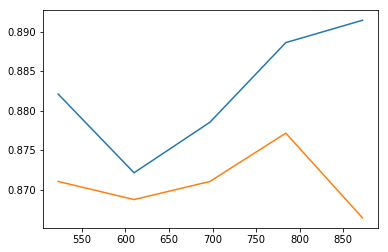

In [136]:
%matplotlib inline
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
training_sizes, train_scores, test_scores = \
    learning_curve(new_clf,x,y,scoring="accuracy", train_sizes = [0.6,0.7,0.8,0.9,1.0],n_jobs=-1)
plt.plot(training_sizes,train_scores.mean(axis=1),label="training_scores")
plt.plot(training_sizes,test_scores.mean(axis=1),label="test_scores")
plt.show()

In [108]:
memo_df = pd.read_csv("test.csv")
print(memo_df.shape)
print(memo_df.isnull().sum())

(418, 11)
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


          PassengerId  Survived  Pclass  Sex       Age  SibSp  Parch  \
Embarked                                                               
C               74820        93     317   95   4005.92     65     61   
Q               32178        30     224   41    786.50     33     13   
S              289496       217    1514  441  16312.75    368    266   

                Fare  child  
Embarked                     
C         10072.2962     15  
Q          1022.2543      4  
S         17439.3988     59  


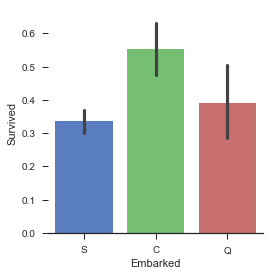

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
print(df.groupby("Embarked").sum())
sns.set(style="ticks")
g = sns.factorplot(x="Embarked",y="Survived",kind="bar",data=df,palette="muted")
g.despine(left=True)

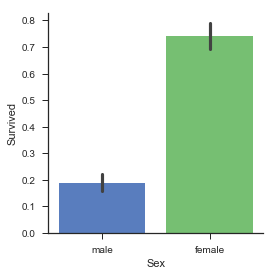

In [81]:
t = sns.factorplot(x="Sex",y="Survived",kind="bar",palette="muted",data=df)

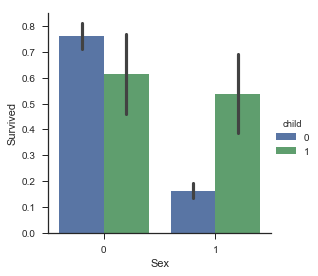

In [90]:
t = sns.factorplot(x="Sex",y="Survived",hue="child",data=df,kind="bar")

In [78]:
#print(len(df.ix[df["Embarked"]=="S","Name"].values))
#print(len(df.ix[df["Embarked"]=="Q","Name"].values))
#print(len(df.ix[df["Embarked"]=="C","Name"].values))
print(df.columns)
print(df.head())

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0

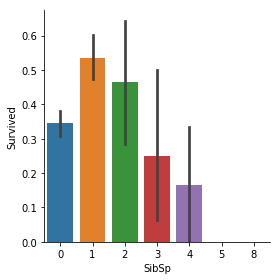

In [72]:
#sns.countplot(x="SibSP",,data=df,kind="bar")
sns.factorplot(x="SibSp",y="Survived",data=df,kind="bar")

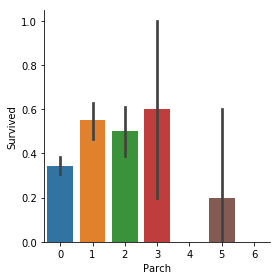

In [73]:
sns.factorplot(x="Parch",y="Survived",data=df,kind="bar")

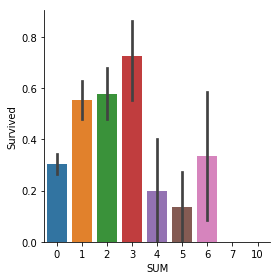

In [81]:
sns.factorplot(x="SUM",y="Survived",data=df,kind="bar")